In [ ]:
from medmnist import PathMNIST

In [ ]:
data_train = PathMNIST(split='train', download=False, size=28, root='data/pathmnist/')
data_test = PathMNIST(split='test', download=False, size=28, root='data/pathmnist/')

100%|██████████| 206M/206M [00:19<00:00, 10.3MB/s] 


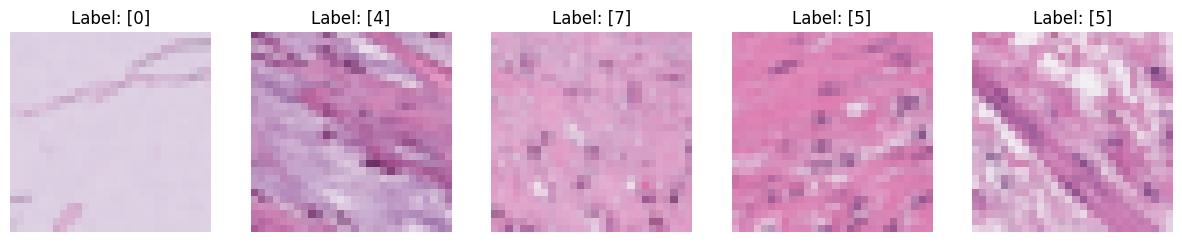

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i in range(5):
    img, label = data_train[i]
    axes[i].imshow(img)  # show as grayscale
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')

In [ ]:
from torchvision.transforms.functional import rgb_to_grayscale

In [ ]:
def _max_value(dtype: torch.dtype) -> int:
    if dtype == torch.uint8:
        return 255
    elif dtype == torch.int8:
        return 127
    elif dtype == torch.int16:
        return 32767
    elif dtype == torch.uint16:
        return 65535
    elif dtype == torch.int32:
        return 2147483647
    elif dtype == torch.int64:
        return 9223372036854775807
    else:
        # This is only here for completeness. This value is implicitly assumed in a lot of places so changing it is not
        # easy.
        return 1

In [ ]:
# one example image
img, _ = pmnist_train_ssl[0][0]
factor = 5.0

# show example image
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3, figsize=(10, 4))
ax[0].imshow(img.permute(1, 2, 0))

transform_color_jitter = transforms.ColorJitter(0.0, (factor, factor), 0.0, 0.0)
img_transformed = transform_color_jitter(img)

ax[1].imshow(img_transformed.permute(1, 2, 0))

# manually adjust contrast
gray = rgb_to_grayscale(img)          # shape: (1, H, W)
mean = gray.mean()                    # scalar
mean_img = mean.expand_as(img)        # broadcast to RGB
img_transformed2 = factor * img + (1 - factor) * mean_img
img_transformed2 = torch.clamp(img_transformed2, 0, _max_value(img.dtype))
# mean = torch.mean(img, dim=(-3, -2, -1), keepdim=True)
# img_transformed2 = (img - mean) * factor + mean

ax[2].imshow(img_transformed2.permute(1, 2, 0))

assert torch.allclose(img_transformed, img_transformed2)